# Data Analyst Project

The <a href="http://www.seanlahman.com/baseball-archive/statistics/">Baseball Data</a> is used for data analyst in this project. The salary is choose as analysis object.

Question posed:
1. What is the trend of average salary?
2. What is player's name with the highest salaries?
3. Do the players with awards have a higher salaries than who without awards?     
4. What is the relationship between different performance metrics? Do any have a strong negative or positive relationship? 
5. What is the relationship between salary and different performance metrics? 

## Load Data from CSVs

In [1]:
## Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Load data from the files which I interested with
## Read these data and store them in pandas' data frame.
file_path = 'baseballdatabank-master/core/'
Master = pd.read_csv(file_path + 'Master.csv')
Batting = pd.read_csv(file_path + 'Batting.csv')
Pitching = pd.read_csv(file_path + 'Pitching.csv')
Fielding = pd.read_csv(file_path + 'Fielding.csv')
Salaries = pd.read_csv(file_path + 'Salaries.csv')
AwardsPlayers = pd.read_csv(file_path + 'AwardsPlayers.csv')

## Investigating the Data

In [3]:
#########################################################
#       Q1. What is the trend of average salary?        #
#########################################################

## Look at the first 5 rows of salaries.csv
Salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


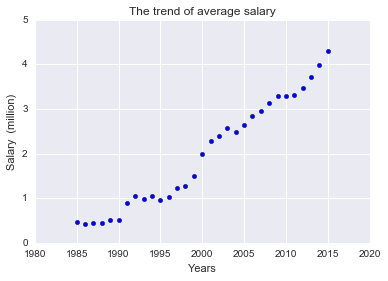

In [4]:
## Grouped the data by yearID to look the trend of average salary in each year
salaries_grouped_by_year = Salaries.groupby(["yearID"], as_index = False)
salary_mean = salaries_grouped_by_year.mean()
## Plot the trend of average salary
plt.scatter(salary_mean["yearID"],salary_mean['salary'] / 1000000)
plt.xlabel("Years")
plt.ylabel("Salary  (million)")
plt.title("The trend of average salary")

<b>Answer: </b> The trend of average salary increases in a whole during these years.

In [5]:
#########################################################
#  Q2. What is player's name with the highest salaries? #
#########################################################
## Merge Salaries and Master dataframes
Master_Salaries_players = Salaries.merge(Master, on=['playerID'], how='inner')
Master_Salaries_players.head(1)

,yearID,teamID,lgID,playerID,salary,birthYear,birthMonth,birthDay,birthCountry,birthState,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,1985,ATL,NL,barkele01,870000,1955.0,7.0,27.0,USA,KY,...,Barker,Leonard Harold,225.0,77.0,R,R,1976-09-14,1987-09-26,barkl001,barkele01


In [16]:
## Get the information of the player with highest salary
## Highest_salary_player --> HSP
info_HSP = Master_Salaries_players.sort_values('salary', axis = 0, ascending=False).iloc[0]

slaray_HSP = info_HSP['salary']
name_HSP = info_HSP['nameFirst'] + " " + info_HSP['nameLast']
weight_HSP = info_HSP['weight']
heigh_HSP = info_HSP['height']
is_alive_HSP = info_HSP['deathMonth'] not in range(1,13) # death month not in 1-12 is alive.
yearID_HSP = info_HSP['yearID']
average_salary = salary_mean.iloc[yearID_HSP-1985]['salary']

print "Information of the highest salary player:"
print "Name: ", name_HSP
print "Weight: ", weight_HSP
print "Heigh: ", heigh_HSP
print "Is alive?: ", is_alive_HSP
print "His salary: ", slaray_HSP
print "The average salary in year",yearID_HSP, ": ",average_salary

Information of the highest salary player:
Name:  Alex Rodriguez
Weight:  225.0
Heigh:  75.0
Is alive?:  True
His salary:  33000000
The average salary in year 2009 :  3277646


<b>Answer: </b> The highest salary player's name is Alex Rodriguez, his weight is 225.0, his heigh is 75.0. he is alive now. In year 2009, he got the highest salary 33,000,000, and the average salary in that year is 3,277,646.

In [7]:
#########################################################
#  Q3. Do the players with awards have a higher salaries#
#      than who without awards?                         #
#########################################################
## The average salaries of players with awards.
Salaries_awards_player = Salaries[Salaries['playerID'].isin(AwardsPlayers['playerID'])]
Mean_Salaries_awards_player = Salaries_awards_player.groupby('yearID').mean()
## The average salaries of players without awards.
Salaries_non_awards_player = Salaries[~Salaries['playerID'].isin(AwardsPlayers['playerID'])]
Mean_Salaries_non_awards_player = Salaries_non_awards_player.groupby('yearID').mean()

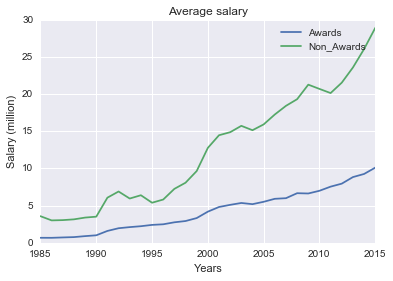

In [8]:
## Plot the average salaries of players with awards.
plt.plot(Mean_Salaries_awards_player.index, Mean_Salaries_awards_player['salary'] / 1000000, label='Awards')
## Plot the average salaries of players with awards.
plt.plot(Mean_Salaries_non_awards_player.index, Mean_Salaries_non_awards_player['salary'] / 100000, label='Non_Awards')
plt.legend()
plt.ylabel("Salary (million)")
plt.xlabel("Years")
plt.title("Average salary")

<b> Answer: </b> This figure shows that the palyers with awards have a higher salary than who without awards. In addition, both of their trends increase over these years. But the salary difference between these two group players gradually increase in the same time.

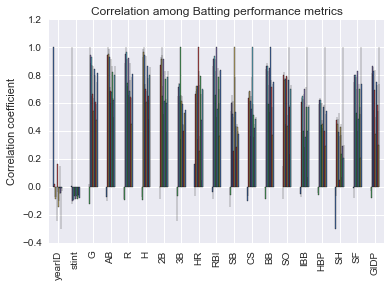

In [9]:
########################################################################
#  Q4. What is the relationship between different performance metrics? #
#      Do any have a strong negative or positive relationship?         #
########################################################################

## Pearson correlation among performance metrics in batting
corr_batting_players = Batting.corr(method='pearson')
corr_batting_players.plot.bar(legend=False)
plt.ylabel("Correlation coefficient")
plt.title("Correlation among Batting performance metrics")

<b>Answer: </b> With the correlation coefficient between different performance metrics, we can find that the SH metric has less correlation with other metrics. 3B, SB, and CS metrics has middle correlation with other metrics, while the correlation between SB and CS is high positive. The rest of metrics have a strong positive relationship among each other.

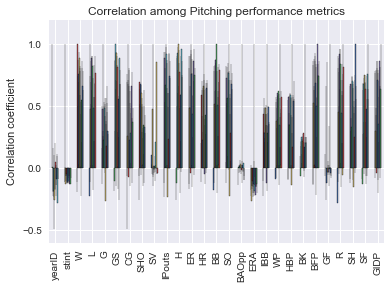

In [10]:
## Pearson correlation among performance metrics in pitching
corr_pitching_players = Pitching.corr(method='pearson')
corr_pitching_players.plot.bar(legend=False)
plt.ylabel("Correlation coefficient")
plt.title("Correlation among Pitching performance metrics")

<b>Answer: </b> ERA and GF have a negtive and little correlation with other metrics. G, SV, BAOpp, BB, and BK have weaker positive correlation with other metrics. The rest metrics have strong positive correlation among each other.

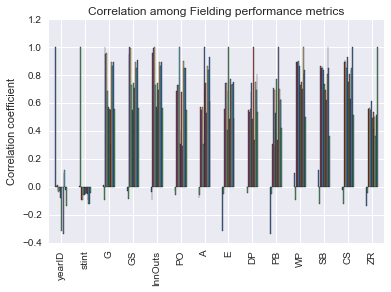

In [11]:
## Pearson correlation among performance metrics in fielding
corr_fielding_players = Fielding.corr(method='pearson')
corr_fielding_players.plot.bar(legend=False)
plt.ylabel("Correlation coefficient")
plt.title("Correlation among Fielding performance metrics")

<b> Answer: </b> ZR has a middle correlation with other metrics. RO has less correlation with A and DP metrics. The rest of metrics have strong positive correlation with other metrics.

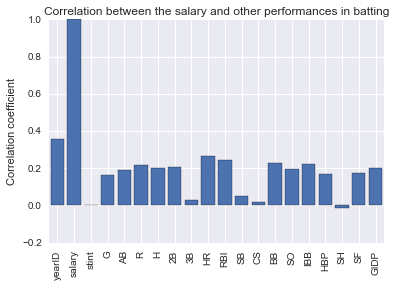

In [12]:
###################################################################################
#  Q5. What is the relationship between salary and different performance metrics? #
###################################################################################

## Ivesgating the relationshipi between salary and performance metrics in batting table.
## Merge Salaries and Batting dataframes.
Batting_Salaries_players = Salaries.merge(Batting, on=['playerID', 'yearID'], how='inner')
corr_batting_salaries_players = Batting_Salaries_players.corr(method='pearson')
## Plot correlation coefficient between Salaries and metrics in batting table.
x_axis = [i + 0.1 for i, _ in enumerate(corr_batting_salaries_players)]
plt.bar(x_axis, corr_batting_salaries_players.salary)
plt.xticks([i + 0.5 for i, _ in enumerate(corr_batting_salaries_players)], 
           corr_batting_salaries_players, rotation=90)
plt.ylabel('Correlation coefficient')
plt.title("Correlation between the salary and other performances in batting")

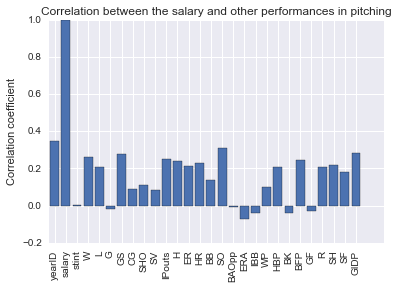

In [13]:
## Ivesgating the relationshipi between salary and performance metrics in pitching table.
## Merge Salaries and Pitching dataframes.
Pitching_Salaries_players = Salaries.merge(Pitching, on=['playerID', 'yearID'], how='inner')
corr_pitching_salaries_players = Pitching_Salaries_players.corr(method='pearson')
## Plot correlation coefficient between Salaries and metrics in pitching table.
x_axis = [i + 0.1 for i, _ in enumerate(corr_pitching_salaries_players)]
plt.bar(x_axis, corr_pitching_salaries_players.salary)
plt.xticks([i + 0.5 for i, _ in enumerate(corr_pitching_salaries_players)], 
           corr_pitching_salaries_players, rotation=90)
plt.ylabel('Correlation coefficient')
plt.title("Correlation between the salary and other performances in pitching")

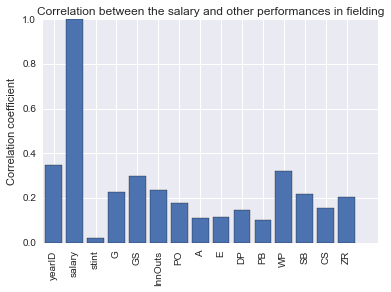

In [14]:
## Ivesgating the relationshipi between salary and performance metrics in fielding table.
## Merge Salaries and Fielding dataframes.
Fielding_Salaries_players = Salaries.merge(Fielding, on=['playerID', 'yearID'], how='inner')
corr_fielding_salaries_players = Fielding_Salaries_players.corr(method='pearson')
## Plot correlation coefficient between Salaries and metrics in fielding table.
x_axis = [i + 0.1 for i, _ in enumerate(corr_fielding_salaries_players)]
plt.bar(x_axis, corr_fielding_salaries_players.salary)
plt.xticks([i + 0.5 for i, _ in enumerate(corr_fielding_salaries_players)], 
           corr_fielding_salaries_players, rotation=90)
plt.ylabel('Correlation coefficient')
plt.title("Correlation between the salary and other performances in fielding")

<b>Answer: </b> 

In these correlation figures, all performance metrics do not have strong correlation with average salary. 

In batting table, metrics 3B, CS, and SH have minimal correlationship with average salary, the metric HR has highest positive correlationship with average salary. 

In pitching table, metrics G, BAOpp have little negtive correlationship with average salary, the metrics GS, SO, and GIDP have higher correlationship with average salary. 

In fielding table, metrics A, E, and PB have little positive correlationship with average salary, while WP has the highest positive correlationship.
